# Unsupervised Learning

Met unsupervised learning kun je patronen of structuren ontdekken in een dataset zonder gebruik te maken van gelabelde data. In tegenstelling tot supervised learning, waarbij je het model traint met bekende labels, leert een unsupervised model zelfstandig om groepen of patronen in de data te identificeren. Voorbeelden van unsupervised learning-modellen zijn onder andere KMeans clustering, hierarchical clustering en DBSCAN.

In dit notebook gebruiken we als voorbeeld KMeans clustering. De meeste unsupervised learning-modellen volgen een standaard stappenplan:
- Importeren van de modelklasse --> import
- Initialiseren van het model (en eventueel parameters instellen) --> model = Model()
- Fitting van het model --> model.fit(X) (waarbij X de data is die we willen groeperen)
- Voorspellingen doen met het model --> model.predict(X)
- Evalueren --> Evalueren van de clustering (bijvoorbeeld door de clusters te visualiseren).
  
Dit stappenplan helpen we volgen om clustering toe te passen op onze dataset, en de gevonden clusters te visualiseren met behulp van PCA.

## Data inladen
We beginnen met het laden van de Digits-dataset uit sklearn.datasets. Deze dataset bevat handgeschreven cijfers (0-9), die zijn opgeslagen als afbeeldingen van 8x8 pixels.
Elke afbeelding is omgezet naar een vector van 64 waarden (de pixelintensiteiten), die samen de features vormen (X). De echte labels van de cijfers worden opgeslagen in y.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data 
y = digits.target 

## Clustering uitvoeren met KMeans

We passen KMeans toe om de cijfers te groeperen in 10 clusters (één cluster per cijfer). Omdat KMeans geen gebruik maakt van de echte labels, proberen we te zien of de clustering logisch overeenkomt met de werkelijke groepen.

Na het uitvoeren van KMeans slaan we de gegenereerde clusterlabels op in ``labels``. Dit zijn de voorspelde clusters waartoe elk datapunt behoort.

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)  # 10 clusters for digits 0-9
kmeans.fit(X)
labels = kmeans.labels_

## Dimensiereductie met PCA
In deze stap visualiseren we de resultaten van de clustering en vergelijken deze met de werkelijke labels (ground truth). We transformeren de data met behulp van PCA en maken scatterplots van de eerste twee componenten (PC1 en PC2). Hieronder zien we drie visualisaties:
- Scatterplot zonder clustering: Deze plot toont de Digits dataset zonder enige vorm van clustering. Alle datapunten worden weergegeven in grijs, en we kunnen de spreiding van de data in de eerste twee hoofcomponenten (PC1 en PC2) zien. 
- Scatterplot met KMeans clustering: In deze plot visualiseren we de resultaten van KMeans clustering. We hebben de data in 10 clusters verdeeld (één per cijfer), en elk cluster is weergegeven met een andere kleur. Deze visualisatie laat zien hoe KMeans de data in groepen heeft verdeeld op basis van de kenmerken van de afbeeldingen. *Let op: het "clustergetal" is arbitrair, deze hoeven niet overeen te komen met de daadwerkelijke labels.*
- Scatterplot met ground truth labels: Deze plot toont de data, maar nu gelabeld op basis van de werkelijke cijfers (ground truth). Elk cijfer (0-9) wordt weergegeven in een eigen kleur, zodat we kunnen zien hoe goed de clusters overeenkomen met de werkelijke labels.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

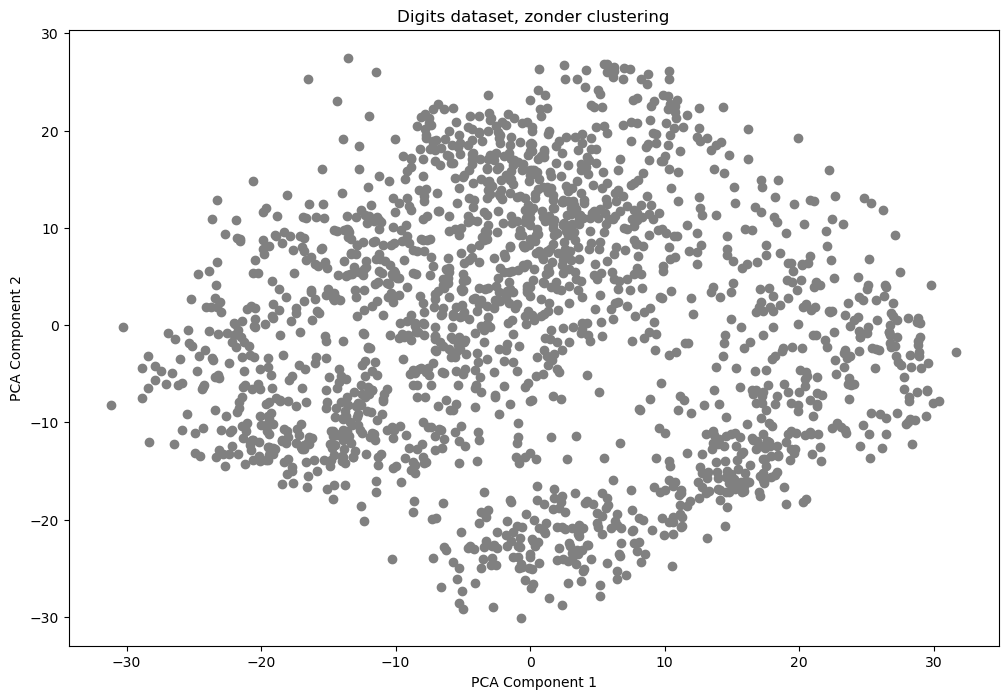

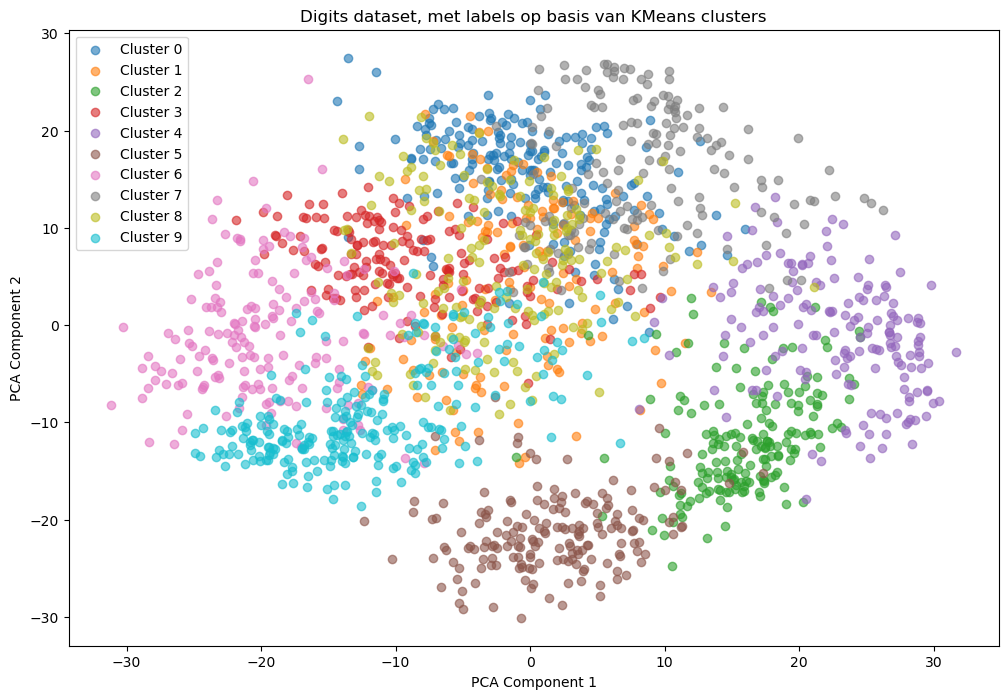

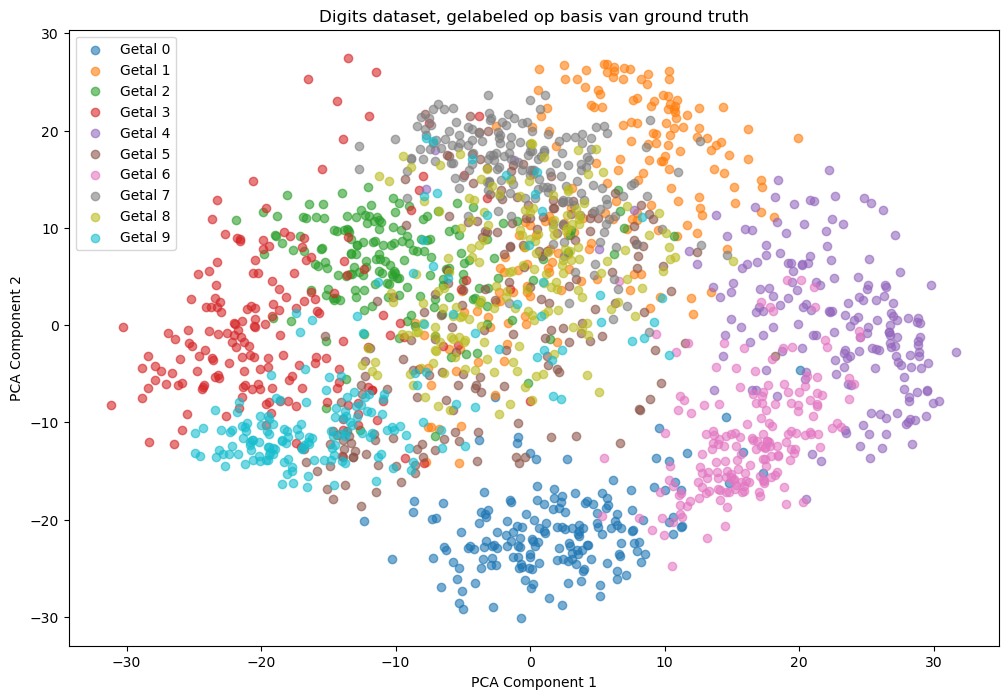

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Scatterplot zonder labels van het clustering algoritme
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='gray')
plt.title('Digits dataset, zonder clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Scatterplot met labels op basis van Kmeans
plt.figure(figsize=(12, 8))
for i in range(10):
    cluster = X_pca[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}', alpha=0.6)
plt.title('Digits dataset, met labels op basis van KMeans clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Scatterplot op basis van "ground truth"
plt.figure(figsize=(12, 8))
for i in range(10):
    ground_truth = X_pca[y == i]
    plt.scatter(ground_truth[:, 0], ground_truth[:, 1], label=f'Getal {i}', alpha=0.6)
plt.title('Digits dataset, gelabeled op basis van ground truth')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()